# Arduino Python

In this notebook, I try to read sensor data through Arduino with Python.

In [3]:
from serial.tools import list_ports
import serial
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ports = list_ports.comports()
for port in ports: print(port)

COM3 - Intel(R) Active Management Technology - SOL (COM3)
COM4 - Arduino Uno (COM4)


In [3]:
serialCom = serial.Serial("COM4", 9600)

In [4]:
# Reset arduino
serialCom.setDTR(False)
time.sleep(1)
serialCom.flushInput()
serialCom.setDTR(True)

In [12]:
for k in range(100):
    try:
        s_bytes = serialCom.readline()
        decoded_bytes = s_bytes.decode("utf-8").strip("\r\n")
        print(decoded_bytes)
    except:
        pass

0.166373610
0.028253995
-0.110402214
-0.246932291
-0.378713941
-0.503194904
-0.617991209
-0.720879507
-0.809889411
-0.883297061
-0.939696598
-0.977995777
-0.997460460
-0.997715282
-0.978755378
-0.940943908
-0.885013008
-0.812034034
-0.723420238
-0.620868682
-0.506365680
-0.382110862
-0.250489926
-0.114052069
0.024589858
0.162750649
0.297784442
0.427075910
0.548149061
0.658658933
0.756484222
0.839745140
0.906829071
0.956451416
0.987650966
0.999830150
0.992753410
0.966556072
0.921745395
0.859183597
0.780070781
0.685939073
0.578591156
0.460106182
0.332753205
0.198998794
0.061404399
-0.077365045
-0.214644598
-0.347797608
-0.474245262
-0.591565895
-0.697487354
-0.789981174
-0.867255878
-0.927831554
-0.970535278
-0.994548034
-0.999407577
-0.985019302
-0.951659107
-0.899972915
-0.830950641
-0.745929193
-0.646536540
-0.534697914
-0.412561941
-0.282473449
-0.146951971
-0.008592862
0.129924190
0.265946507
0.396839618
0.520096778
0.633330821
0.734368133
0.821267127
0.892344856
0.946240043
0.98190

In [13]:
decoded_bytes

'-0.850259685'

In [8]:
data = pd.read_csv(r"Python\rec.txt", skiprows=4, names=["time"] + ["T{:d}".format(i) for i in range(1,9)] + ["H{:d}".format(i) for i in range(1,9)])

In [13]:
data

,time,T1,T2,T3,T4,T5,T6,T7,T8,H1,H2,H3,H4,H5,H6,H7,H8
0,Wed May 15 15:13:51 2024,21.4,21.4,21.0,21.0,21.8,21.7,21.3,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
1,Wed May 15 15:13:54 2024,21.4,21.4,21.0,21.0,21.8,21.7,21.3,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
2,Wed May 15 15:13:56 2024,21.4,21.4,21.0,21.0,21.8,21.7,21.3,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
3,Wed May 15 15:13:58 2024,21.4,21.4,21.0,21.0,21.8,21.7,21.3,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
4,Wed May 15 15:14:00 2024,21.4,21.4,21.0,21.0,21.8,21.7,21.3,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,Wed May 15 15:49:25 2024,21.4,21.4,21.0,21.0,21.8,21.6,21.4,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
955,Wed May 15 15:49:27 2024,21.4,21.4,21.0,21.0,21.8,21.6,21.4,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
956,Wed May 15 15:49:29 2024,21.4,21.4,21.0,21.0,21.8,21.6,21.4,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0
957,Wed May 15 15:49:31 2024,21.4,21.4,21.0,21.0,21.8,21.6,21.4,21.6,59.0,59.0,55.0,59.0,56.0,56.0,58.0,55.0


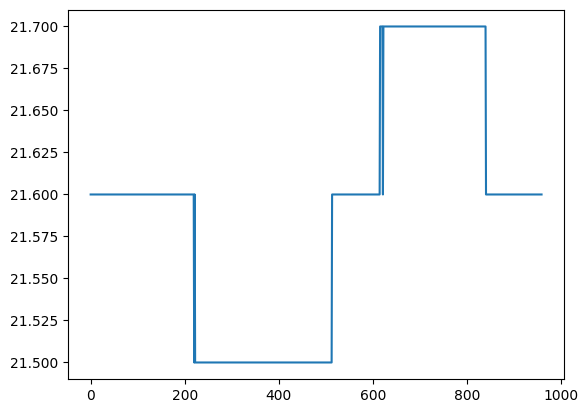

In [19]:
plt.plot(data.T8)